In [236]:
# pandas: 자료구조, 전처리기능, 분석기능
"""
    -자료구조 : numpy + dict (중복을 허용하고 순서를 보장해서)
        -인덱싱 발달 : RangeIndex 기본적으로 생성
        -숫자와 키를 이용해서 접근가능(혼동방지를 위해 iloc[숫자], loc[키]) deprecated : ix
"""
# 1차원배열 -> 인덱스
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], # 둘이 숫자다르면 에러
                index=['a', 'b', 'c', 'd']) # 행이름
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [239]:
data['b'] # 키

0.5

In [238]:
data[1] # 숫자

0.5

In [20]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [22]:
list(data.items()) # zip

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [23]:
# 없는키 생성
data['e']=1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [24]:
# 숫자로할때는 마지막이 제외였지만 (마지막전까지 였지만)
# 키는 전부 출력
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [25]:
data[0:2]

a    0.25
b    0.50
dtype: float64

In [27]:
data[(data > 0.3) & (data < 0.8)] #조건출력

b    0.50
c    0.75
dtype: float64

In [101]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [103]:
data.loc[1] # index 1 번 출력
# data.iloc[1]

'a'

In [47]:
data.loc[1:3] # index 1,3 번 출력

1    a
3    b
dtype: object

In [33]:
# []리스트 {}dict ()tuple
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
# 열이름(columns) , 행이름(index) 
data = pd.DataFrame({'area':area, 'pop':pop})#시리즈의 조합 : 열중심임
data 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [13]:
data['area']
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [45]:
# 에러 : 인덱스는 열중심이다
# data['California']
# data.['area']['California'] # 이렇게 해야..
# data.loc[['California'], :] # 이렇게도..
data.iloc[[0]] # [[]] dataframe으로 반환



,area,pop
California,423967,38332521


In [60]:
data['density']=data['pop']/data['area'] # 새로운 컬럼 첨가
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [61]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [62]:
data.keys()

Index(['area', 'pop', 'density'], dtype='object')

In [63]:
data.T # 돌리기

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [249]:
data.iloc[:3, :2] # 행렬 기준으로 조회
# data.loc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [31]:
data.loc[:'Illinois',:'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [71]:
# 문제 density > 100 큰 'pop','density'열을 출력하시오
data.loc[data.density > 100, ['pop', 'density']] 
#density의 california의 데이터를 90으로 수정하시오
data.iloc[0,2]=90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [73]:
import numpy as np
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
s.reindex(['e', 'b', 'f', 'd'])# 순서를 보장(? 컨트롤 가능이란 뜻인가)

a    0.447971
b    0.619294
c   -0.818847
d   -1.628297
e   -1.238847
dtype: float64


e   -1.238847
b    0.619294
f         NaN
d   -1.628297
dtype: float64

In [74]:
data = {'a':0., 'b':1.,'c':2.}
s=pd.Series(data)

In [75]:
s.dtype

dtype('float64')

In [76]:
s.array

<PandasArray>
[0.0, 1.0, 2.0]
Length: 3, dtype: float64

In [83]:
print(s.to_numpy())#데이터프레임 -> numpy
print(s+s)
print(s*3)

[0. 1. 2.]
a    0.0
b    2.0
c    4.0
dtype: float64
a    0.0
b    3.0
c    6.0
dtype: float64


In [87]:
sdata={'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}
obj3=pd.Series(sdata)
print(obj3)
print(obj3.shape)
stats=['California', 'Ohio', 'Oregon', 'Texas'] # 키가 일치되는것만 추출 가능
obj4=pd.Series(sdata, index=stats)
obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
(4,)


California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [90]:
print("시리즈 인덱스\n", obj3.index)
print("시리즈 인덱스\n", obj4.index)
print("널이 있는가\n", pd.isnull(obj4))
print("결측치 체크\n", pd.notnull(obj4))
# numpy는 일치해서 연산가능, pandas는 불일치해도 연산가능
print("연산결과 출력\n", obj3 + obj4)

시리즈 인덱스
 Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')
시리즈 인덱스
 Index(['California', 'Ohio', 'Oregon', 'Texas'], dtype='object')
널이 있는가
 California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
결측치 체크
 California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
연산결과 출력
 California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [95]:
# to_datatime 시간 인덱스 생성
df = pd.DataFrame({'y':[1,2,3]}, index=pd.to_datetime(["2000-03-31 00:00:00",
                                                     "2000-05-31 00:00:00",
                                                     "2000-08-31 00:00:00"]))
print(df)
df.index.to_period('M') # 달 인덱스 변환 # 인덱스가 발달

            y
2000-03-31  1
2000-05-31  2
2000-08-31  3


PeriodIndex(['2000-03', '2000-05', '2000-08'], dtype='period[M]', freq='M')

In [96]:
#a의 갯수 세기
s = pd.Series(['A', 'B', 'Aaba', 'Baca', np.nan, 'CABA', 'cat'])
s.str.count('a') #자체에 srt 객체 내장

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


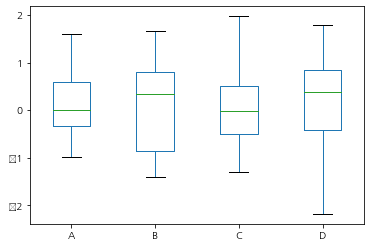

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=np.random.randn(25,4) # 25x4

df=pd.DataFrame(data, columns=list('ABCD')) #판다스로 df에 할당

ax=df.plot.box() # plot : matplotlib의 영향을 받고있다 (wrapper했다)

plt.show()

C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


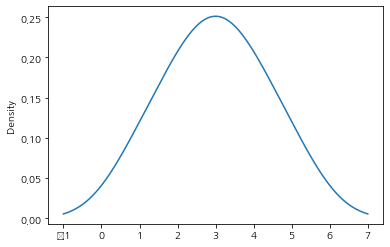

In [99]:
s=pd.Series([1, 2, 2.5, 3, 3.5, 4, 5]) # 1,2  4,5 는 사잇값이 없다
s.plot.kde() #kernel density estimate 커널 밀도 추정(없는 데이터는 스스로 생성) : interpolation 보간법
# 비선형 커널을 이용해서 추정
plt.show()

In [4]:
# scikits
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)# Bunch 데이터타입
"""
c_, r_ : columns, row 결합함수
4개의 독립변수 + 1개 종속변수 = 4개의 열로 결합
"""
# print(iris)
iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])# 리스트 +연산자
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
iris.columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name']
iris['Name']=iris['Name'].astype('int32')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


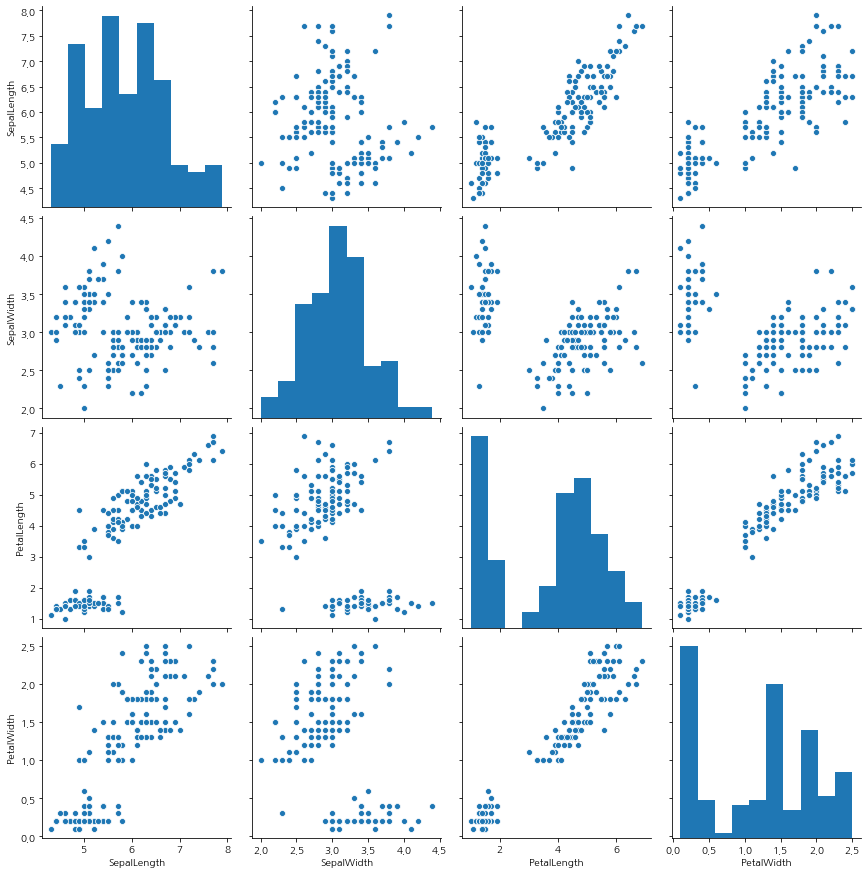

In [151]:
# 정방행렬, 상관도(pairplot), 공분산(cov), 상관계수(corr)
import seaborn as sns
sns.pairplot(iris.iloc[:,:4], height=3) # 변수별 상관도

In [152]:
# 변수 생성
(iris.assign(sepal_ratio=iris['SepalWidth'] / iris['SepalLength']).head())

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,0,0.686275
1,4.9,3.0,1.4,0.2,0,0.612245
2,4.7,3.2,1.3,0.2,0,0.680851
3,4.6,3.1,1.5,0.2,0,0.673913
4,5.0,3.6,1.4,0.2,0,0.720000


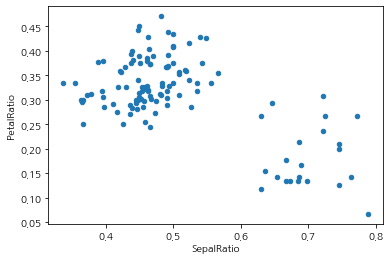

In [153]:
# 체이닝가능
(iris.query('SepalLength > 5')# 쿼리문을 통해 데이터 작업
    .assign(SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
           PetalRatio=lambda x: x.PetalWidth / x.PetalLength)
    .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

In [148]:
d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])} 

In [154]:
print('차원', df.ndim)

차원 2


In [155]:
print(df.head(2))
print(df.tail(2))

          A         B         C         D
0  0.701104  1.414269 -0.487268 -0.023005
1 -1.628458 -1.000427 -0.294020 -0.982470
           A         B         C         D
23  1.349172  1.036900 -0.982372  0.623923
24 -0.042743 -1.764343 -0.617676  0.388375


In [417]:
print(df)
print()
print('합계', df.sum())
print()
print('평균', df.mean())
print()
print('표준편차', df.std())
print()
print(df.describe()) # count, mean, std, 분위수
print()
print(df.describe(include='all'))

       A     B     C     D
0  -0.17  0.21  0.28  0.62
1   0.03 -0.90  0.60  0.80
2  -0.69  0.61  0.07  0.74
3   0.08  0.13 -0.76  0.39
4  -0.58  1.20  0.31  0.31
5  -2.80  1.53 -1.72  1.60
6  -0.01 -1.06 -1.32 -0.50
7  -0.56  0.66 -0.06  0.16
8  -0.04 -0.28 -1.11 -0.04
9  -0.30 -0.21 -0.67  0.21
10 -0.47 -1.76 -1.18  1.01
11  0.16 -0.97  0.03  0.11
12 -0.24 -1.77  2.32  0.20
13  0.49 -0.63  0.70  1.33
14  1.30  2.02 -0.84 -0.29
15 -0.19 -1.01 -1.32 -2.00
16 -0.59 -1.54 -0.08  0.95
17  0.55  0.40 -0.09  0.57
18  0.79 -0.21 -0.03  0.86
19 -0.51 -0.85 -0.93  1.08
20  1.20 -0.25 -0.28 -0.55
21 -1.02 -0.53  0.56  0.65
22 -1.67  0.91  0.36 -1.26
23  0.59 -0.55  0.65 -0.55
24 -1.73  0.02  0.34  0.11

합계 A   -6.38
B   -4.82
C   -4.16
D    6.48
dtype: float64

평균 A   -0.26
B   -0.19
C   -0.17
D    0.26
dtype: float64

표준편차 A   0.91
B   0.98
C   0.88
D   0.81
dtype: float64

          A     B     C     D
count 25.00 25.00 25.00 25.00
mean  -0.26 -0.19 -0.17  0.26
std    0.91  0.98  0.88  0.81
mi

In [49]:
# 문제
data = {'state': ['경기', '강원', '서울', '충북', '인천'],
       'year':[2000,2001,2002,2001,2002],
       'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}

In [50]:
"""
1) 위의 데이터로 데이터 프레임을 생성하시오 ( 인덱스는 one, two, three, four, five)로 하시오
2) state만 출력하시오
3) debt 열을 추가하시오 모든 값을 16.5로 입력하시오
4) 파생변수 estern에 주소가 서울인가를 따져 서울은 True 아니면 False를 입력하시오
5) debt 열에 대하여 (-1.2, -1.5, -1.7) index=[two, four, five]로 된 시리즈를 만들고 대체하시오
합계를 출력하시오
모든행의 데이터를 설명해보시오
"""
import numpy as np
import pandas as pd

df = pd.DataFrame({'state':data['state'], 'year':data['year'], 'pop':data['pop']}, index={'one', 'two', 'three', 'four', 'five'})
print(df)
print()
print(df.state)
print()
df['debt'] = 16.5
print(df)

      state  year  pop
two      경기  2000  1.5
five     강원  2001  1.7
three    서울  2002  3.6
one      충북  2001  2.4
four     인천  2002  2.9

two      경기
five     강원
three    서울
one      충북
four     인천
Name: state, dtype: object

      state  year  pop  debt
two      경기  2000  1.5  16.5
five     강원  2001  1.7  16.5
three    서울  2002  3.6  16.5
one      충북  2001  2.4  16.5
four     인천  2002  2.9  16.5


In [66]:
frame2=pd.DataFrame(data, columns=['year', 'state', 'pop', '우욱'], index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,우욱
one,2000,경기,1.5,NaN
two,2001,강원,1.7,NaN
three,2002,서울,3.6,NaN
four,2001,충북,2.4,NaN
five,2002,인천,2.9,NaN


In [67]:
print(frame2['state'])
print(frame2.state)

one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object
one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object


In [68]:
frame2['debt'] = 16.5

In [69]:
frame2['estern'] = frame2.state == '서울'
frame2.head(999) # 반환row갯수 결정

,year,state,pop,우욱,debt,estern
one,2000,경기,1.5,NaN,16.5,False
two,2001,강원,1.7,NaN,16.5,False
three,2002,서울,3.6,NaN,16.5,True
four,2001,충북,2.4,NaN,16.5,False
five,2002,인천,2.9,NaN,16.5,False


In [195]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] =val

In [70]:
frame2

,year,state,pop,우욱,debt,estern
one,2000,경기,1.5,NaN,16.5,False
two,2001,강원,1.7,NaN,16.5,False
three,2002,서울,3.6,NaN,16.5,True
four,2001,충북,2.4,NaN,16.5,False
five,2002,인천,2.9,NaN,16.5,False


In [199]:
print(frame2['pop'].sum())
print(frame2['debt'].sum())
print(frame2[['pop','debt']].sum())

12.100000000000001
-4.4
pop     12.1
debt    -4.4
dtype: float64


In [200]:
import pandas as pd
data = {'name': ['하늘이', '찬호박', '우리야', '함께가', '하성공'],
'age': [40, 50, 30, 20, 70],
'preScore': [14, 28, 39, 25, 32],
'postScore': [20, 90, 55, 65, 79]}
df = pd.DataFrame(data,columns = ['name', 'age', 'preScore', 'postScore'])
df 

,name,age,preScore,postScore
0,하늘이,40,14,20
1,찬호박,50,28,90
2,우리야,30,39,55
3,함께가,20,25,65
4,하성공,70,32,79


In [201]:
print(df['age'].sum())
print(df['preScore'].mean())
print(df['preScore'].cumsum())
print('데이터설명')
print(df['preScore'].describe())#시리즈에 적용
print('데이터끝')
print(df['preScore'].var())#시리즈에 적용
print(df['preScore'].std())#시리즈에 적용
print(df['preScore'].skew())# 왜도 기준 0이면 정규분포
print(df['preScore'].kurt())# 첨도 기준 3이면 정규분포

210
27.6
0     14
1     42
2     81
3    106
4    138
Name: preScore, dtype: int64
데이터설명
count     5.0000
mean     27.6000
std       9.2358
min      14.0000
25%      25.0000
50%      28.0000
75%      32.0000
max      39.0000
Name: preScore, dtype: float64
데이터끝
85.30000000000001
9.235799911215056
-0.5110345040062979
0.8509652849263816


In [334]:
"""
-다음 문제 데이터

-문제 : '2015-2018 증가율'을 %로 변경하시오
- 2015-2017의 증가율을 구해서 변수를 추가하시오
(열이름:'2015-2017 증가율')
"""
data = {"서울": ['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],

       "부산": ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],

       "인천": ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],

       "대구": ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]}

columns=['지역','2018','2017','2016','2015','2015-2018증가율']

index = ["서울","부산","인천","대구"] 


qdf = pd.DataFrame(data, columns=['지역','2018','2017','2016','2015','2015-2018증가율'], index = ["서울","부산","인천","대구"] )
qdf.loc['서울'] = data['서울']
qdf.loc['부산'] = data['부산']
qdf.loc['인천'] = data['인천']
qdf.loc['대구'] = data['대구']



for i in range(len(qdf['2015-2018증가율'])):
    qdf['2015-2018증가율'][i] = str(qdf['2015-2018증가율'][i]) +'%'
#     print(qdf['2015-2018증가율'][i])
qdf

,지역,2018,2017,2016,2015,2015-2018증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283%
부산,경상권,3448737,3393191,3512547,3655437,0.0163%
인천,수도권,2890451,2632035,2517680,2466338,0.0982%
대구,경상권,2466052,2431774,2456016,2473990,0.0141%


In [340]:
# pd.options.display.float_format = '{:.2f}'.format
qdf2=pd.DataFrame(data)
qdf2
qdf2=qdf2.T # 돌리기 turnAround
qdf2.columns=['지역','2018','2017','2016','2015','2015-2018증가율']


qdf2['2015-2018증가율'] = qdf2['2015-2018증가율'] * 100
print(qdf2['2015-2018증가율'])
qdf2['2015-2017증가율'] = ((qdf2['2017'] - qdf2['2015']) / qdf2['2015'] * 100).astype(float).round(2) #dtype이 플롯이어야....

qdf2['2015-2017증가율']
# qdf2
#오전종료
s = pd.Series([-0.1111, -1.33333, 2.77777])
s2 = pd.Series(qdf2['2015-2017증가율']).astype(float)
s2.round(2)
print(s2.dtype)
print(s2)
qdf2

서울   2.83
부산   1.63
인천   9.82
대구   1.41
Name: 2015-2018증가율, dtype: object
float64
서울   -2.26
부산   -7.17
인천    6.72
대구   -1.71
Name: 2015-2017증가율, dtype: float64


,지역,2018,2017,2016,2015,2015-2018증가율,2015-2017증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83,-2.26
부산,경상권,3448737,3393191,3512547,3655437,1.63,-7.17
인천,수도권,2890451,2632035,2517680,2466338,9.82,6.72
대구,경상권,2466052,2431774,2456016,2473990,1.41,-1.71


In [ ]:
# 오후 시작 ===========================================================================================================================================================================================================

In [489]:
frame3=pd.DataFrame(np.arange(12).reshape((4,3)),
                   index =[['1반', '1반', '2반', '2반',],[1,2,1,2]],
                   columns=[['서울권', '지방권', '지방권'], ['서울', '대전', '대구']])
print(frame3)
frame3

     서울권 지방권    
      서울  대전  대구
1반 1   0   1   2
   2   3   4   5
2반 1   6   7   8
   2   9  10  11


서울권 지방권    
      서울  대전  대구
1반 1   0   1   2
   2   3   4   5
2반 1   6   7   8
   2   9  10  11

In [490]:
frame3.index.names=['key1','key2']
frame3.columns.names=['state','color']
print(frame3)
frame3

state     서울권 지방권    
color      서울  대전  대구
key1 key2            
1반   1      0   1   2
     2      3   4   5
2반   1      6   7   8
     2      9  10  11


state     서울권 지방권    
color      서울  대전  대구
key1 key2            
1반   1      0   1   2
     2      3   4   5
2반   1      6   7   8
     2      9  10  11

In [510]:
# 인덱싱도 계층적으로 부여
print(frame3['서울권'])
print(frame3['지방권']['대전'])
frame3.swaplevel('key1', 'key2')
# frame3

color      서울
key1 key2    
1반   1      0
     2      3
2반   1      6
     2      9
key1  key2
1반    1        1
      2        4
2반    1        7
      2       10
Name: 대전, dtype: int32


state     서울권 지방권    
color      서울  대전  대구
key2 key1            
1    1반     0   1   2
2    1반     3   4   5
1    2반     6   7   8
2    2반     9  10  11

In [511]:
import pandas as pd, numpy as np
df = pd.Series([1, np.nan, np.nan, 3])
df.interpolate() #보간법을 적용

0   1.00
1   1.67
2   2.33
3   3.00
dtype: float64

In [512]:
#함수적용 map(series), apply(열, 행별로), applymap(열요소 행요소)
data = {'team' : ['일본', '한국', '중국', '사우디'],
       'against': ['한국', '일본', '사우디', '중국'],
       'fifa_rank':[65, 23, 31, 21]}
columns=['team', 'against', 'fifa_rank']
df = pd.DataFrame(data, columns=columns)
df


,team,against,fifa_rank
0,일본,한국,65
1,한국,일본,23
2,중국,사우디,31
3,사우디,중국,21


In [521]:
gfg_string = '대한 민국 만세 '
gfg_list = 5 * [pd.Series(list(gfg_string))] # 시리즈 :
  
df = pd.DataFrame(data = gfg_list)
#데이터 프레임의 내용을 문자열로 반환
print("Original dataframe:\n" + df.to_string(index = False,  header = False), end = '\n\n')  # carriege 리턴

Original dataframe:
 대  한     민  국     만  세   
 대  한     민  국     만  세   
 대  한     민  국     만  세   
 대  한     민  국     만  세   
 대  한     민  국     만  세   



In [520]:
#전부객체 : 함수를 대신 #msk:무명함수람다
# 행데이터가 입력
df = df.apply(lambda x:x.sort_values(), axis = 1) # 값에 의해 정렬 
df
#axis = 0 이면 열로 정렬
#axis = 1 이면 행으로 정렬

,2,5,8,4,0,6,3,7,1
0,,,,국,대,만,민,세,한
1,,,,국,대,만,민,세,한
2,,,,국,대,만,민,세,한
3,,,,국,대,만,민,세,한
4,,,,국,대,만,민,세,한


In [ ]:
print(df.to_string(index=False, header=False), end='\n\n')

In [72]:
frame4=pd.DataFrame((np.random.randn(4,3)),columns=list(['rain',
        'income', 'tax']), index=['seoul','daejun', 'incheon','daegu'])
print(frame4) 

             rain    income       tax
seoul    0.124287 -0.911697 -1.227194
daejun   0.479443 -0.770343  1.508083
incheon -0.634820 -0.936324 -0.876523
daegu   -0.521111 -0.990035 -0.875480


In [ ]:
print("absolute함수 적용", np.abs(frame4))
# 데이터 프레임을 ndarray의 매개변수로 전달
# 데이터프레임은 numpy기반이기 때문 numpy->dataframe 문제없음

In [524]:
f=lambda x: x.max()- x.min() # range 범위
print("함수 객체의 행 적용(열방향)", frame4.apply(f))
print()
print("함수 객체의 열 적용(행방향)", frame4.apply(f, axis=1))

함수 객체의 행 적용(열방향) rain     1.58
income   1.86
tax      3.13
dtype: float64

함수 객체의 열 적용(행방향) seoul     2.25
daejun    1.40
incheon   1.01
daegu     2.40
dtype: float64


In [75]:
format=lambda x: '%.2f' %x # 문자열 포맷 형식
print(frame4.applymap(format)) 
#각 요소

          rain income    tax
seoul     0.12  -0.91  -1.23
daejun    0.48  -0.77   1.51
incheon  -0.63  -0.94  -0.88
daegu    -0.52  -0.99  -0.88


In [76]:
print(frame4['rain'].map(format))#열데이터

seoul       0.12
daejun      0.48
incheon    -0.63
daegu      -0.52
Name: rain, dtype: object


In [ ]:
print(frame)

In [ ]:
"""
문제 : 이름 국어 영어 수학 3인분을 입력받으시오
입력받은 데이터를 데이터프레임으로 초기화 하고
과목별 합계 평균, 분산, 표준편차를 출력하시오
"""
import numpy as np
import pandas as pd

# data = {'이름' : ['김일본', '이한국', '박중국'],
#         '국어' : [np.random.randint(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)],
#         '영어' : [np.random(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)],
#         '수학' : [np.random(100), np.random.randint(100), np.random.randint(100), np.random.randint(100)]
#        }

qdf4 = pd.DataFrame((np.random.rand(3,3) * 100).round(0), columns=['국어', '수학', '영어'], index=['김일본', '이한국', '박중국'])


# print(qdf4)
# print('합계', df.sum())
# print()
# print('평균', df.mean())
# print()
# print('표준편차', df.std())
qdf4['평균'] = qdf4.mean()
qdf4['표준편차'] = qdf4.std()
qdf4

In [78]:
students=[]
name=[]
for i in range(3):
    student = input("학생의 이름, 국어, 영어, 수학 점수를 입력하시오")
    students.append(student.split(",")[1:])
    name.append(student.split(",")[0])
    
dataStu = pd.DataFrame(students, columns=['국어', '영어', '수학'], index=name)
dataStu

학생의 이름, 국어, 영어, 수학 점수를 입력하시오1,1,1,1
학생의 이름, 국어, 영어, 수학 점수를 입력하시오2,2,2,2
학생의 이름, 국어, 영어, 수학 점수를 입력하시오3,3,3,3


,국어,영어,수학
1,1,1,1
2,2,2,2
3,3,3,3


In [80]:
dataStu['국어'] = pd.to_numeric(dataStu['국어'])
dataStu['영어'] = pd.to_numeric(dataStu['영어'])
dataStu['수학'] = pd.to_numeric(dataStu['수학'])
dataStu.describe() # 분석자료 출력

,국어,영어,수학
count,3.0,3.0,3.0
mean,2.0,2.0,2.0
std,1.0,1.0,1.0
min,1.0,1.0,1.0
25%,1.5,1.5,1.5
50%,2.0,2.0,2.0
75%,2.5,2.5,2.5
max,3.0,3.0,3.0


In [87]:
print(dataStu.apply(lambda x:x.sum(), axis=0))# 1 : 개인별 = row
print()
print(dataStu.apply(lambda x:x.mean(), axis=0))
print()
print(dataStu.apply(lambda x:x.var(), axis=0))
print()
print(dataStu.apply(lambda x:x.std(), axis=0))
print()

국어    6
영어    6
수학    6
dtype: int64

국어    2.0
영어    2.0
수학    2.0
dtype: float64

국어    1.0
영어    1.0
수학    1.0
dtype: float64

국어    1.0
영어    1.0
수학    1.0
dtype: float64



In [92]:
print(dataStu.iloc[:3,:3].corr())# corr 상관계수 행렬출력

     국어   영어   수학
국어  1.0  1.0  1.0
영어  1.0  1.0  1.0
수학  1.0  1.0  1.0


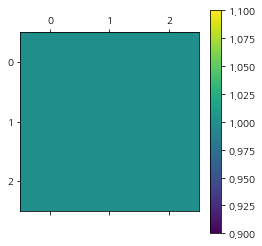

In [93]:
import matplotlib.pyplot as plt

plt.matshow(dataStu.iloc[:3,:3].corr()) #이미지로 출력
plt.colorbar()
plt.show()

In [540]:
import pymysql
import numpy
import pandas as pd

conn = pymysql.connect(host="192.168.0.106", port=3306, user='root',
                     passwd='1234acorn', db='sungjuk_test', charset='utf8mb4', cursorclass=pymysql.cursors.DictCursor)


cursor = conn.cursor()
cursor.execute("select * from student")
rez = cursor.fetchall()
print("패치의 데이터 타입", type(rez))
#데이터프레임으로 변환
df= pd.DataFrame(rez)
print(df.describe())
print(df.dtypes)
print(df.shape)
df



패치의 데이터 타입 <class 'list'>
       bunho    kor   mat   eng  total  average
count   4.00   4.00  4.00  4.00   4.00     4.00
mean    9.25  77.75 75.00 75.25 228.00    76.00
std    12.53  44.50 36.45 31.31 110.34    36.78
min     2.00  11.00 22.00 33.00  66.00    22.00
25%     2.75  77.75 65.50 60.75 204.00    68.00
50%     3.50 100.00 89.50 84.50 274.00    91.33
75%    10.00 100.00 99.00 99.00 298.00    99.33
max    28.00 100.00 99.00 99.00 298.00    99.33
bunho           int64
name           object
kor             int64
mat             int64
eng             int64
total           int64
average       float64
grade          object
schoolcode     object
dtype: object
(4, 9)


,bunho,name,kor,mat,eng,total,average,grade,schoolcode
0,2,김만덕,100,99,99,298,99.33,A,CH00000001
1,3,고려인,100,99,99,298,99.33,A,CH00000001
2,4,종로구,100,80,70,250,83.33,B,IC00000001
3,28,전공사,11,22,33,66,22.00,F,SE00000001


In [94]:
#kor : average까지의 데이터에 대하여 var, std, sum, kurt 값을 출력하시오
# 국어 영어 수학간의 상관계수 행렬을 출력하시오

anal=df.loc[:,'kor':'average']
print(anal.var())
print(anal.std())
print(anal.sum())
print(anal.skew())
print(anal.kurt())

KeyError: 'kor'

In [542]:
anal=df.loc[:,"kor":"eng"]
anal.corr()
# 축이 정직교 하지않으면 : 짐벌락 ------------선으로 나타남
# 새로운 투영해서 데이터를 재해석 => 노이즈를 제거한 분석 대상이다

,kor,mat,eng
kor,1.00,0.97,0.90
mat,0.97,1.00,0.98
eng,0.90,0.98,1.00


In [538]:
# 정방행렬에서 고유값(eigen) 분해 => 고유값, 고유벡터(정직교한다 : 근사값0이다) (특이행렬 분해도 알아야함) ★
print(type(anal.corr()))
np.linalg.eig(anal.corr())
# 축의 이름을 결정 : 새로운 변수에 대한 이름 정의 ( ex : 국어가 영향을 많이 끼치면 -> 언어축)
# 노이즈 제거 후 분석 : PCA(principal compnent analysis) 주성분 분석 : 다음에 더 설명
# 값이 클수록 영향이 강하고 적을수록 적다 
# 노이즈 값 선별은 상대적이다

<class 'pandas.core.frame.DataFrame'>


(array([], dtype=float64), array([], shape=(0, 0), dtype=float64))

In [543]:
eigen_result=np.linalg.eig(anal.corr())
eigen_result[1][1]

array([-0.58722899,  0.04523671, -0.80815577])

In [544]:
eigen_result[1][0].dot(eigen_result[1][1])

6.522560269672795e-16

In [545]:
eigen_result[1][0].dot(eigen_result[1][2]) # 지수가 -17임을 주목 -> 0의 근사값

-5.551115123125783e-17

In [546]:
eigen_result[1][:, 0].dot(eigen_result[1][:, 1]) # :모든행을 의미

2.983724378680108e-16

In [547]:
df.dropna()

,bunho,name,kor,mat,eng,total,average,grade,schoolcode
0,2,김만덕,100,99,99,298,99.33,A,CH00000001
1,3,고려인,100,99,99,298,99.33,A,CH00000001
2,4,종로구,100,80,70,250,83.33,B,IC00000001
3,28,전공사,11,22,33,66,22.00,F,SE00000001


In [548]:
df.dropna(axis=1)

,bunho,name,kor,mat,eng,total,average,grade,schoolcode
0,2,김만덕,100,99,99,298,99.33,A,CH00000001
1,3,고려인,100,99,99,298,99.33,A,CH00000001
2,4,종로구,100,80,70,250,83.33,B,IC00000001
3,28,전공사,11,22,33,66,22.00,F,SE00000001


In [549]:
df.fillna(method='ffill') # foward fill : cfill(backward)

,bunho,name,kor,mat,eng,total,average,grade,schoolcode
0,2,김만덕,100,99,99,298,99.33,A,CH00000001
1,3,고려인,100,99,99,298,99.33,A,CH00000001
2,4,종로구,100,80,70,250,83.33,B,IC00000001
3,28,전공사,11,22,33,66,22.00,F,SE00000001


In [550]:
df.fillna(method='ffill', axis=1) # foward fill : cfill(backward)

,bunho,name,kor,mat,eng,total,average,grade,schoolcode
0,2,김만덕,100,99,99,298,99.33,A,CH00000001
1,3,고려인,100,99,99,298,99.33,A,CH00000001
2,4,종로구,100,80,70,250,83.33,B,IC00000001
3,28,전공사,11,22,33,66,22.00,F,SE00000001


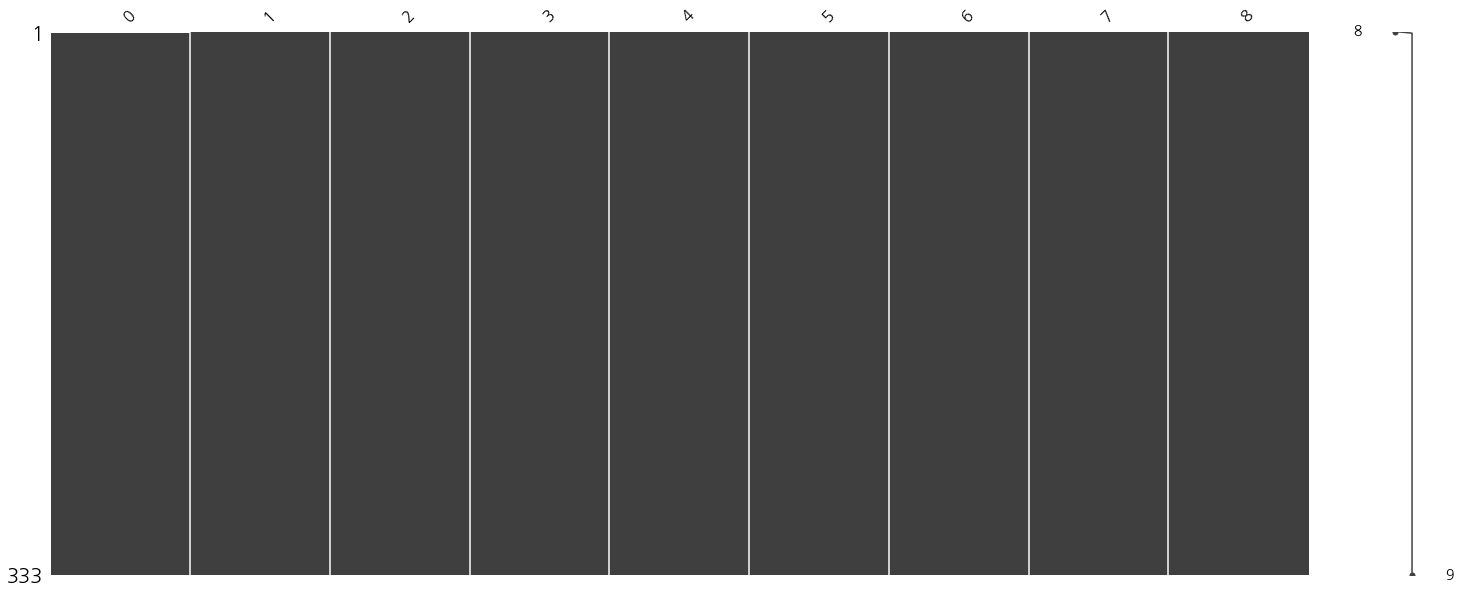

In [2]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('pima.csv', header=None)
msno.matrix(df)
plt.show()

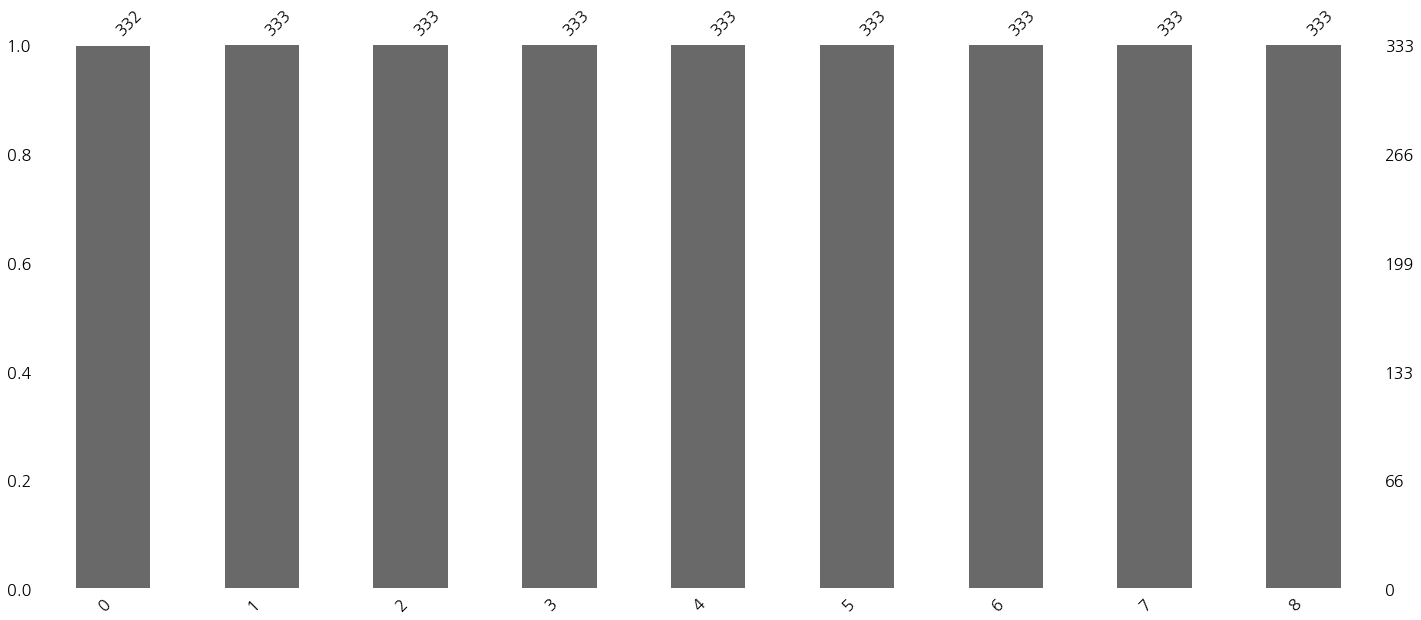

In [552]:
msno.bar(df)
plt.show()

In [553]:
# 0번째 데이터가 하나 비어있다 => 제거
df.dropna()

,0,1,2,3,4,5,6,7,8
1,1.00,6,148,72,35,33.6,0.627,50,Yes
2,2.00,1,85,66,29,26.6,0.351,31,No
3,3.00,1,89,66,23,28.1,0.167,21,No
4,4.00,3,78,50,32,31,0.248,26,Yes
5,5.00,2,197,70,45,30.5,0.158,53,Yes
...,...,...,...,...,...,...,...,...,...
328,328.00,2,88,58,26,28.4,0.766,22,No
329,329.00,9,170,74,31,44,0.403,43,Yes
330,330.00,10,101,76,48,32.9,0.171,63,No
331,331.00,5,121,72,23,26.2,0.245,30,No


In [4]:
from scipy import stats
import numpy as np
df = pd.DataFrame({'key':[1,1,1,1,10000000,1,1,1,1],
                 'data1':[1,1,1,1,1,1,1,1,200000000]})

In [6]:
z_scores = stats.zscore(df) #함수를 이용해서 zscore: 각데이터에서 평균을 빼고 / 표준편차
abs_z_scores = np.abs(z_scores)
print(abs_z_scores)
#3표준편차 내에 있을경우 99.7%의 값 # 표준편차 2단계 95%로 이상값 제거 (10000000, 200000000)
filtered_entries = (abs_z_scores < 2).all(axis=1)
new_df = df[filtered_entries]
new_df

[[0.35355339 0.35355339]
 [0.35355339 0.35355339]
 [0.35355339 0.35355339]
 [0.35355339 0.35355339]
 [2.82842712 0.35355339]
 [0.35355339 0.35355339]
 [0.35355339 0.35355339]
 [0.35355339 0.35355339]
 [0.35355339 2.82842712]]


,key,data1
0,1,1
1,1,1
2,1,1
3,1,1
5,1,1
6,1,1
7,1,1


In [ ]:
#cut : 범위 level -> labeling

df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})# 20개 무작위 값
labels = [ "{0} - {1}".format(i, i+9) for i in range(0, 100, 10)]
# ['0-9', '10-19', ...]
print(labels)
# right = 오른쪽을 하위 범주로 포함할것인가?(ex : 60의 경우 50~59에 포함 ), 
df['group'] = pd.cut(df.value, range(0, 105, 10), right=True, labels=labels)

df.head(10)
# 범주화

# df['group'] = pd.qcut(df.value, 10, labels=labels)# quick cut 일정한 사이즈(10게)


In [95]:
s = pd.Series(['a', 'b', 'c', 'a'], dtype='category')
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

In [96]:
df = pd.DataFrame({"A": ['a', 'b', 'c', 'a']})
df['B'] = df['A'].astype('category')
df

,A,B
0,a,a
1,b,b
2,c,c
3,a,a


In [97]:
# 순서형 상중하 # 카테고리 데이터타입화
raw_cat = pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c', 'd'], ordered=False)
raw_cat

[NaN, b, c, NaN]
Categories (3, object): [b, c, d]

In [ ]:
import re
text = '문의사항이 있으면 032-232-3245 으로 연락주시기 바랍니다. 123-222-2222'
regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
regex = re.compile(r'(\d{3})-(\d{3})-\d{4}')
matchobj = regex.search(text)
phonenumber = matchobj.group()
print(phonenumber)
matchobj = regex.findall(text)
print(matchobj)

In [ ]:
import pandas as pd
s = pd.Series(['대한_민국_만세'])
s.str.split('_')

In [8]:
import re
data = {'aaa':'iabslba@naver.com', 'bbb':'steve@naver.com', 'ccc':'rob@naver.com', 'Wes':np.nan}
data=pd.Series(data)
print(data)
print()
print(data.isnull())
print()

print('네이버',data.str.contains('naver'))
print()
print('매칭데이터')
print()
# [] 선택 + 1개이상의 의미
# \. .이라는 문자로 이해
pattern=r'[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]'
matches=data.str.match(pattern, flags=re.IGNORECASE)
matches=data.str.findall(pattern, flags=re.IGNORECASE)

print()
print('매칭', matches)
print()
print(matches.str.get(1))
print()
print('매칭데이터')
print()
print(matches.str[0])
print()


aaa    iabslba@naver.com
bbb      steve@naver.com
ccc        rob@naver.com
Wes                  NaN
dtype: object

aaa    False
bbb    False
ccc    False
Wes     True
dtype: bool

네이버 aaa    True
bbb    True
ccc    True
Wes     NaN
dtype: object

매칭데이터


매칭 aaa    [iabslba@naver.c]
bbb      [steve@naver.c]
ccc        [rob@naver.c]
Wes                  NaN
dtype: object

aaa   NaN
bbb   NaN
ccc   NaN
Wes   NaN
dtype: float64

매칭데이터

aaa    iabslba@naver.c
bbb      steve@naver.c
ccc        rob@naver.c
Wes                NaN
dtype: object



In [9]:
import re
data = {'aaa':'iabslba@naver.com', 'bbb':'steve@naver.com', 'ccc':'rob@naver.com', 'Wes':np.nan}
data=pd.Series(data)
print(data)
print()
print(data.isnull())
print()

print('네이버',data.str.contains('naver'))
print()
print('매칭데이터')
print()
# [] 선택 + 1개이상의 의미
# \. .이라는 문자로 이해
pattern=r'[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]'
matches=data.str.match(pattern, flags=re.IGNORECASE)
matches=data.str.findall(pattern, flags=re.IGNORECASE)

print()
print('매칭', matches)
print()
print(matches.str.get(1))
print()
print('매칭데이터')
print()
print(matches.str[0])
print()
print(data.str[:5])



aaa    iabslba@naver.com
bbb      steve@naver.com
ccc        rob@naver.com
Wes                  NaN
dtype: object

aaa    False
bbb    False
ccc    False
Wes     True
dtype: bool

네이버 aaa    True
bbb    True
ccc    True
Wes     NaN
dtype: object

매칭데이터


매칭 aaa    [iabslba@naver.c]
bbb      [steve@naver.c]
ccc        [rob@naver.c]
Wes                  NaN
dtype: object

aaa   NaN
bbb   NaN
ccc   NaN
Wes   NaN
dtype: float64

매칭데이터

aaa    iabslba@naver.c
bbb      steve@naver.c
ccc        rob@naver.c
Wes                NaN
dtype: object

aaa    iabsl
bbb    steve
ccc    rob@n
Wes      NaN
dtype: object
